In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet

# Import Data

In [16]:
# Import Data
us = pd.read_csv('univariate_datasets/univariate_df_United_States.csv',usecols=[1,2],  parse_dates=[0]).reset_index(drop=True)
us.columns = ['ds', 'y']
belgium = pd.read_csv('univariate_datasets/univariate_df_Belgium.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
belgium.columns = ['ds', 'y']
chile = pd.read_csv('univariate_datasets/univariate_df_Chile.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
chile.columns = ['ds', 'y']
czechia = pd.read_csv('univariate_datasets/univariate_df_Czechia.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
czechia.columns = ['ds', 'y']
estonia = pd.read_csv('univariate_datasets/univariate_df_Estonia.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
estonia.columns = ['ds', 'y']
france = pd.read_csv('univariate_datasets/univariate_df_France.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
france.columns = ['ds', 'y']
ireland = pd.read_csv('univariate_datasets/univariate_df_Ireland.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
ireland.columns = ['ds', 'y']
israel = pd.read_csv('univariate_datasets/univariate_df_Israel.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
israel.columns = ['ds', 'y']
italy = pd.read_csv('univariate_datasets/univariate_df_Italy.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
italy.columns = ['ds', 'y']
malaysia = pd.read_csv('univariate_datasets/univariate_df_Malaysia.csv', usecols=[1,2], parse_dates = [0]).reset_index(drop=True)
malaysia.columns = ['ds', 'y']
# test_train split
train_size = int(len(us)*0.8)

small_constant = 1
def mape(y_true, prediction):
    return np.mean(np.abs((y_true - prediction) / (y_true + small_constant))) * 100

evaluation = pd.DataFrame(columns = ['Country','Model', 'MAE', 'MAPE'])

# US

14:36:45 - cmdstanpy - INFO - Chain [1] start processing


14:36:45 - cmdstanpy - INFO - Chain [1] done processing
14:36:45 - cmdstanpy - INFO - Chain [1] start processing
14:36:45 - cmdstanpy - INFO - Chain [1] done processing
14:36:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:45 - cmdstanpy - INFO - Chain [1] start processing
14:36:45 - cmdstanpy - INFO - Chain [1] done processing


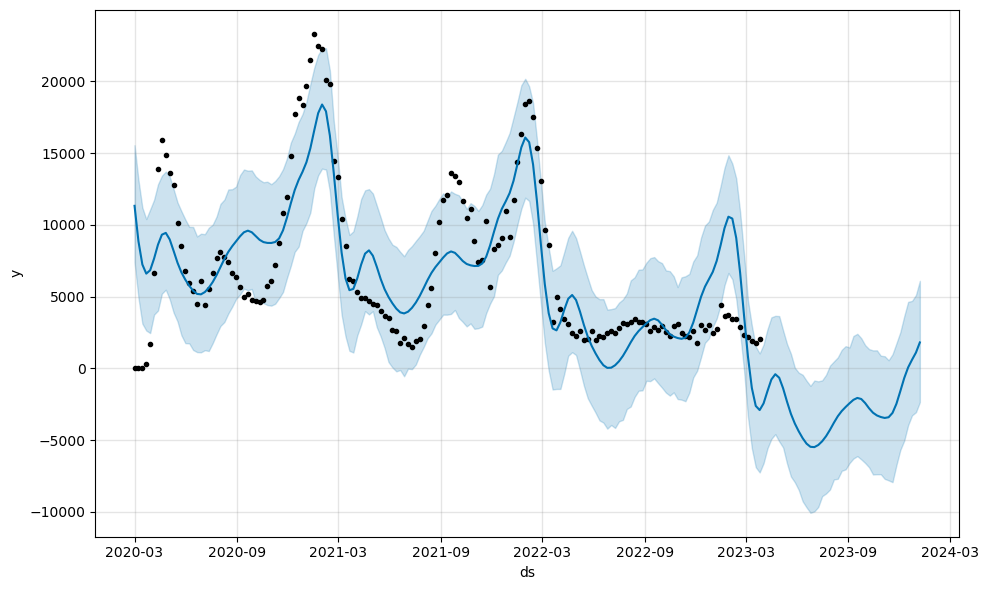

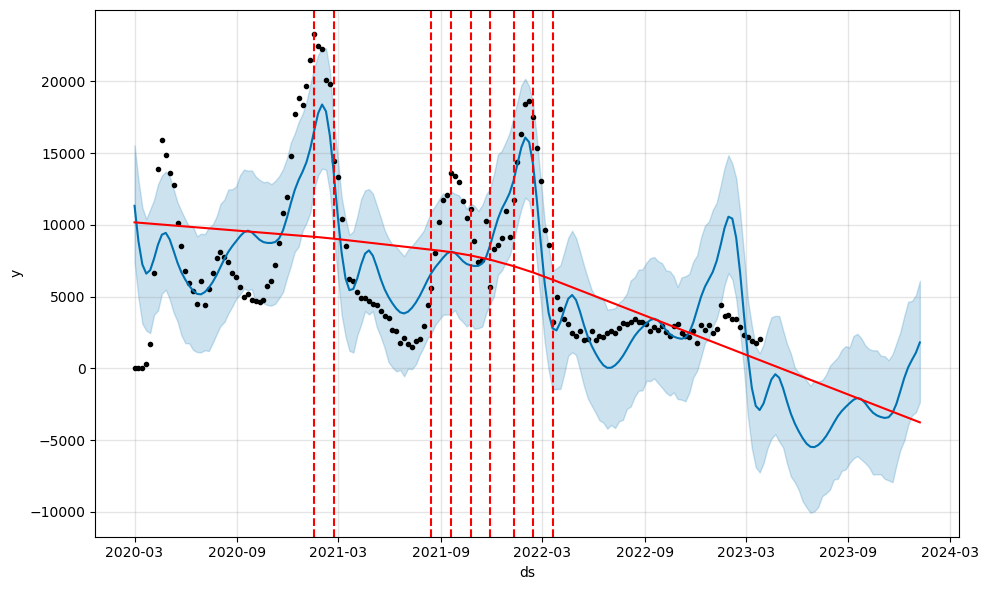

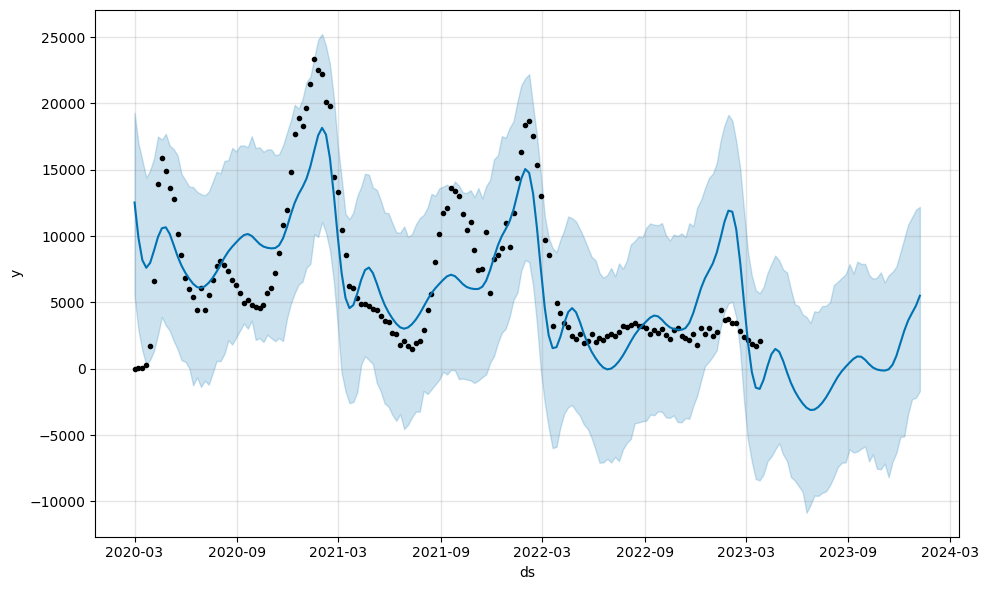

In [38]:
train, test = us[0:train_size], us[train_size:]

# baseline prophet model
model_baseline = Prophet()

# Fit the model on the training dataset
model_baseline.fit(train)

# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=41, freq='W')
future_baseline
# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)
# Visualize the forecast
model_baseline.plot(forecast_baseline); # Visualize the forecast components
# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')

performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
performance_baseline_MAPE = mape(performance_baseline['y'], performance_baseline['yhat'])
# evaluation = evaluation.append({'Country':'United States', 'Model':'Baseline', 'MAE':performance_baseline_MAE, 'MAPE':performance_baseline_MAPE}, ignore_index=True)

# Changepoints 
# Default change points
from prophet.plot import add_changepoints_to_plot

# Change points to plot
fig = model_baseline.plot(forecast_baseline)
a = add_changepoints_to_plot(fig.gca(), model_baseline, forecast_baseline)
#1 observed change points

# Create the prophet model with confidence internal of 95%
model_changepoint = Prophet(interval_width=0.95, n_changepoints=1)
# Fit the model using the training dataset
model_changepoint.fit(train)
# Create the time range for the forecast
future_changepoint = model_changepoint.make_future_dataframe(periods=41, freq='W')
# Make prediction
forecast_changepoint = model_changepoint.predict(future_changepoint)
# Visualize the forecast
model_changepoint.plot(forecast_changepoint);
# Change points to plot
fig = model_changepoint.plot(forecast_changepoint)
a = add_changepoints_to_plot(fig.gca(), model_changepoint, forecast_changepoint)
# performance eval 
performance_changepoint = pd.merge(test, forecast_changepoint[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_changepoint_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
performance_changepoint_MAPE = mape(performance_baseline['y'], performance_baseline['yhat'])
# evaluation = evaluation.append({'Country':'United States', 'Model':'Changepoint', 'MAE':performance_changepoint_MAE, 'MAPE':performance_changepoint_MAPE}, ignore_index=True)



In [ ]:
# time events

# COVID time window
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,
})

# Super Bowl time window
superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02', '2021-02-07','2023-2-12']),
    'lower_window': -7,
    'upper_window': 1,
})

# vaccine approval time window
vaccine_us = pd.DataFrame({
    'holiday': 'vaccine',
    'ds': pd.to_datetime(['2020-12-11']),
    'lower_window': -15,
    'upper_window': 15,
})
# vacine approval belgium
vaccine_belgium = pd.DataFrame({
    'holiday': 'vaccine',
    'ds': pd.to_datetime(['2021-01-06']),
    'lower_window': -15,
    'upper_window': 15,
})
# vacine approval malaysia
vaccine_malaysia = pd.DataFrame({
    'holiday': 'vaccine',
    'ds': pd.to_datetime(['2021-26-18']),
    'lower_window': -15,
    'upper_window': 15,
})
# Combine all events
events = pd.concat((COVID, superbowl))

# Take a look at the events data
events